In [1]:
import json
import os

In [2]:
import wget
from zipfile import ZipFile

wget.download("http://files.heuritech.com/raw_files/dataset_surfrider_cleaned.zip", ".")

with ZipFile('dataset_surfrider_cleaned.zip', 'r') as zipObj:
     zipObj.extractall()

In [3]:
PATH = './dataset_surfrider_cleaned'

In [4]:
classes = json.load(open(PATH+"/classes.json"))
classes_dict = {k:v for v,k in enumerate(classes)}
with open(PATH+"/dataset.names",'w') as dataset_file:
    for name in classes:
        dataset_file.write( name+ '\n')
with open(PATH+"/dataset.data",'w') as dataset_file:
    dataset_file.write( "classes={}".format(len(classes))+ '\n')
    dataset_file.write( "train={}".format(PATH+"/train.txt")+ '\n')
    dataset_file.write( "valid={}".format(PATH+"/valid.txt")+ '\n')
    dataset_file.write( "names={}".format(PATH+"/dataset.names")+ '\n')

In [5]:
dataset = []
with open(PATH+"/dataset.json") as f:
    for line in f:
        dataset.append(json.loads(line))

In [6]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[2])/2.0
    y = (box[1] + box[3])/2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

In [7]:
i = 0
with open(PATH+"/dataset.txt",'w') as dataset_file:
    with open(PATH+"/train.txt",'w') as train, open(PATH+"/valid.txt",'w') as valid:
        for item in dataset:
            os.rename(PATH+"/Images_md5/{}".format(item['md5']) ,PATH+"/Images_md5/{}.jpg".format(item['md5']) )
            dataset_file.write(PATH+"/Images_md5/{}.jpg".format(item['md5']) + '\n')
            if i< 430:
                train.write(PATH+"/Images_md5/{}.jpg".format(item['md5']) + '\n')
            else:
                valid.write(PATH+"/Images_md5/{}.jpg".format(item['md5']) + '\n')
            i += 1
            with open(PATH+"/Images_md5/{}.txt".format(item['md5']),'w') as out_file:
                size = [int(item['size']['width']), int(item['size']['height'])]
                for box in item['labels']:
                    bb = [ int(i) for i in box['bbox']]
                    norm_bb = convert(size, bb)
                    cls_id = classes_dict[box['label']]
                    out_file.write(str(cls_id) + " " + " ".join([str(a) for a in norm_bb]) + '\n')

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches


In [9]:
item = dataset[0]
image = Image.open(PATH+"/Images_md5/{}.jpg".format(item['md5']))

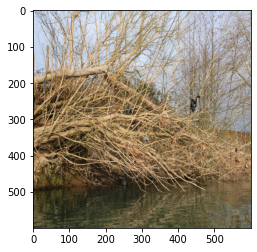

In [10]:
im = np.array(image, dtype=np.uint8)
plt.imshow(im)

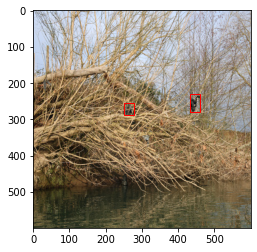

In [11]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

for box in item['labels']:
    box = [ int(i) for i in box['bbox']]
    # Create a Rectangle patch
    rect = patches.Rectangle((box[0],box[1]), box[2] - box[0], box[3] - box[1],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()